In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## apoptotic cells

In [2]:
channel_importance = pd.read_csv("apoptotic_cells/channel_importance.csv")
interpretation_methods = ["PXPermute", "DeepLift", "IntegratedGradients", "LRP", "GuidedGradCAM"]
channel_importance.loc[:, interpretation_methods] = MinMaxScaler().fit_transform(channel_importance.loc[:, interpretation_methods])
channel_importance.head()

,fold,channel,PXPermute,DeepLift,IntegratedGradients,LRP,GuidedGradCAM
0,1,Ch0,0.016934,0.536150,0.965327,0.089264,0.147628
1,1,Ch1,0.967601,0.230190,0.059443,0.429087,0.147888
2,3,Ch0,0.000000,0.299684,0.475304,0.000000,0.158674
3,3,Ch1,0.918331,0.183626,0.135990,0.268165,1.000000
4,4,Ch0,0.015669,0.559447,0.734979,0.404710,0.221419


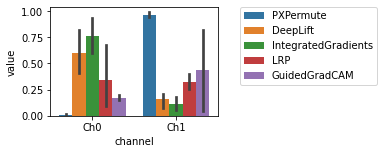

In [3]:

num_channels = len(channel_importance.channel.unique())

fig, ax = plt.subplots(figsize = (1.5*num_channels,2))

ax = sns.barplot(data = pd.melt(channel_importance, id_vars=["fold","channel"]),
                 x = "channel",
                 y = "value",
                 hue = "variable")

ax.legend(bbox_to_anchor=(1.1, 1.05))

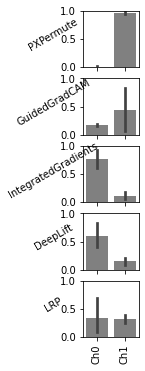

In [4]:
methods = ['PXPermute', 'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = num_methods,figsize = (0.5*num_channels,num_methods+1), sharex = True, sharey = True)

for j , meth in enumerate(methods):
    
    ax[j] = sns.barplot(data = channel_importance,
                     x = "channel",
                     order = channel_importance.channel.unique(),
                     y = meth,
                     palette = ["gray"],
                    ax = ax[j])
    
    ax[j].set_ylim(0,1.) 
    ax[j].set_ylabel(meth, rotation = 30)
    ax[j].set_xlabel("")


ax[-1].set_xticklabels(channel_importance.channel.unique(), rotation = 90)

plt.savefig("final_figures/apoptotic_cells_channel_importance.png" , bbox_inches='tight')
plt.savefig("final_figures/apoptotic_cells_channel_importance.svg" , bbox_inches='tight')

In [5]:
performance_all_channels = pd.read_csv("apoptotic_cells/performance_with_all_channels.csv")


performance_all_channels = performance_all_channels.dropna()[[
                           "f1_micro",
                           "f1_macro",
                           "accuracy"]]

performance_all_channels["method"] = "all channels"

performance = pd.read_csv("apoptotic_cells/results_with_best_channels.csv")

performance = performance[["method",
                           "f1_micro",
                           "f1_macro",
                           "accuracy"]]

performance = performance.append(performance_all_channels, ignore_index = True)

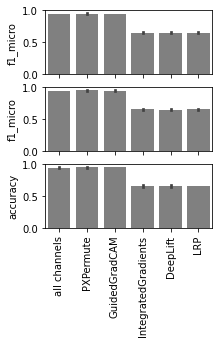

In [6]:
methods = ['all channels','PXPermute', 'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = 3, figsize = (0.5*num_methods,4), sharex = True, sharey = True)

for j , metr in enumerate(["f1_micro","f1_micro", "accuracy"]):

    ax[j] = sns.barplot(data = performance,
               x = "method", 
                order = methods,
                y = metr,
               palette = ["gray"],
                    ax = ax[j])

    ax[j].set_ylim(0,1.)
    ax[j].set_xlabel("")


    
ax[-1].set_xticklabels(methods, rotation = "vertical")    
    


plt.savefig("final_figures/apoptotic_cells_performance.png" , bbox_inches='tight')
plt.savefig("final_figures/apoptotic_cells_performance.svg" , bbox_inches='tight')


## synapse formation

In [7]:
channel_importance = pd.read_csv("synapse_formation/channel_importance.csv")
interpretation_methods = ["PXPermute", "DeepLift", "IntegratedGradients", "LRP", "GuidedGradCAM"]
channel_importance.loc[:, interpretation_methods] = MinMaxScaler().fit_transform(channel_importance.loc[:, interpretation_methods])


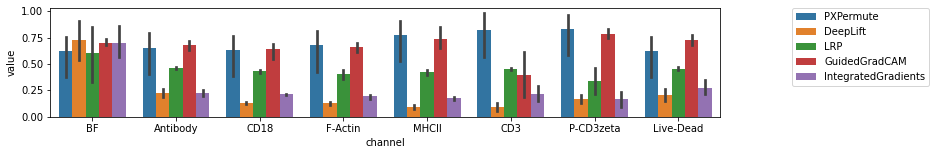

In [8]:

num_channels = len(channel_importance.channel.unique())

fig, ax = plt.subplots(figsize = (1.5*num_channels,2))

ax = sns.barplot(data = pd.melt(channel_importance, id_vars=["fold","channel"]),
                 x = "channel",
                 y = "value",
                 hue = "variable")

ax.legend(bbox_to_anchor=(1.1, 1.05))

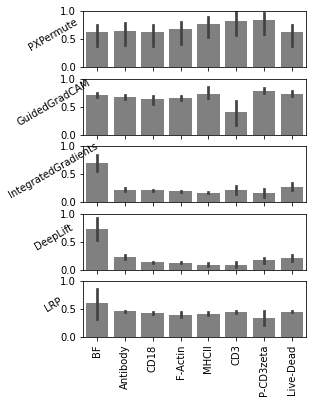

In [9]:
methods = ['PXPermute', 'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = num_methods,figsize = (0.5*num_channels,num_methods+1), sharex = True, sharey = True)

for j , meth in enumerate(methods):
    
    ax[j] = sns.barplot(data = channel_importance,
                     x = "channel",
                     order = channel_importance.channel.unique(),
                     y = meth,
                     palette = ["gray"],
                    ax = ax[j])
    
    ax[j].set_ylim(0,1.) 
    ax[j].set_ylabel(meth, rotation = 30)
    ax[j].set_xlabel("")


ax[-1].set_xticklabels(channel_importance.channel.unique(), rotation = 90)

plt.savefig("final_figures/synapse_formation_channel_importance.png" , bbox_inches='tight')
plt.savefig("final_figures/synapse_formation_channel_importance.svg" , bbox_inches='tight')

In [10]:
performance_all_channels = pd.read_csv("synapse_formation/performance_with_all_channels.csv")


performance_all_channels = performance_all_channels.dropna()[[
                           "f1_micro",
                           "f1_macro",
                           "accuracy"]]

performance_all_channels["method"] = "all channels"

performance = pd.read_csv("apoptotic_cells/results_with_best_channels.csv")

performance = performance[["method",
                           "f1_micro",
                           "f1_macro",
                           "accuracy"]]

performance = performance.append(performance_all_channels, ignore_index = True)


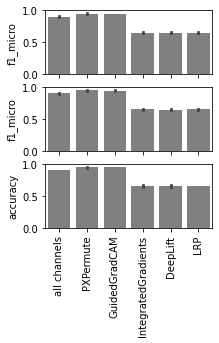

In [11]:
methods = ['all channels','PXPermute', 'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = 3, figsize = (0.5*num_methods,4), sharex = True, sharey = True)

for j , metr in enumerate(["f1_micro","f1_micro", "accuracy"]):

    ax[j] = sns.barplot(data = performance,
               x = "method", 
                order = methods,
                y = metr,
               palette = ["gray"],
                    ax = ax[j])

    ax[j].set_ylim(0,1.)
    ax[j].set_xlabel("")


    
ax[-1].set_xticklabels(methods, rotation = "vertical")    
    



plt.savefig("final_figures/synapse_formation_performance.png" , bbox_inches='tight')
plt.savefig("final_figures/synapse_formation_performance.svg" , bbox_inches='tight')

## white blood cell

In [12]:
channel_importance = pd.read_csv("white_blood_cells/channel_importance.csv")
interpretation_methods = ["PXPermute", "DeepLift", "IntegratedGradients", "LRP", "GuidedGradCAM"]
channel_importance.loc[:, interpretation_methods] = MinMaxScaler().fit_transform(channel_importance.loc[:, interpretation_methods])


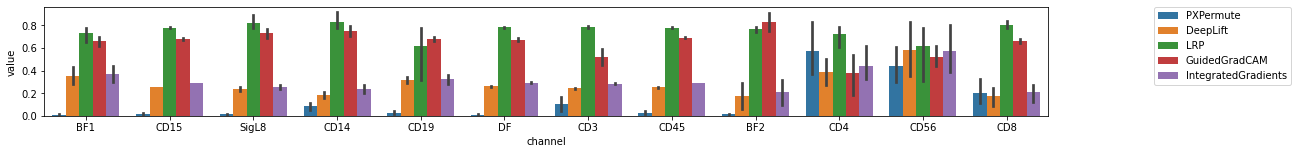

In [13]:

num_channels = len(channel_importance.channel.unique())

fig, ax = plt.subplots(figsize = (1.5*num_channels,2))

ax = sns.barplot(data = pd.melt(channel_importance, id_vars=["fold","channel"]),
                 x = "channel",
                 y = "value",
                 hue = "variable")

ax.legend(bbox_to_anchor=(1.1, 1.05))

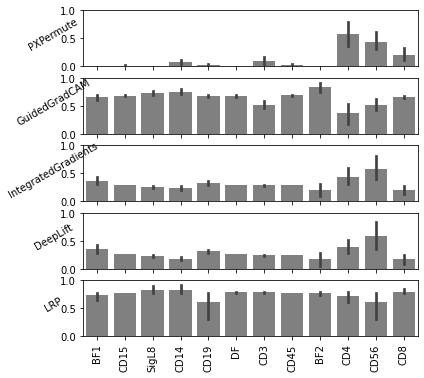

In [14]:
methods = ['PXPermute', 'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = num_methods,figsize = (0.5*num_channels,num_methods+1), sharex = True, sharey = True)

for j , meth in enumerate(methods):
    
    ax[j] = sns.barplot(data = channel_importance,
                     x = "channel",
                     order = channel_importance.channel.unique(),
                     y = meth,
                     palette = ["gray"],
                    ax = ax[j])
    
    ax[j].set_ylim(0,1.) 
    ax[j].set_ylabel(meth, rotation = 30)
    ax[j].set_xlabel("")


ax[-1].set_xticklabels(channel_importance.channel.unique(), rotation = 90)


plt.savefig("final_figures/white_blood_cells_channel_importance.png" , bbox_inches='tight')
plt.savefig("final_figures/white_blood_cells_channel_importance.svg" , bbox_inches='tight')

In [15]:
performance_all_channels = pd.read_csv("white_blood_cells/performance_with_all_channels.csv")


performance_all_channels = performance_all_channels.dropna()[[
                           "f1_micro",
                           "f1_macro",
                           "accuracy"]]

performance_all_channels["method"] = "all channels"

performance = pd.read_csv("apoptotic_cells/results_with_best_channels.csv")

performance = performance[["method",
                           "f1_micro",
                           "f1_macro",
                           "accuracy"]]

performance = performance.append(performance_all_channels, ignore_index = True)

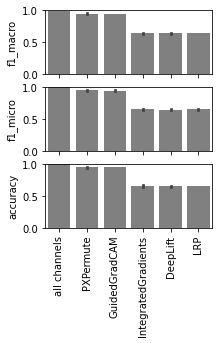

In [17]:
methods = ['all channels','PXPermute', 'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = 3, figsize = (0.5*num_methods,4), sharex = True, sharey = True)

for j , metr in enumerate(["f1_macro","f1_micro", "accuracy"]):

    ax[j] = sns.barplot(data = performance,
               x = "method", 
                order = methods,
                y = metr,
               palette = ["gray"],
                    ax = ax[j])

    ax[j].set_ylim(0,1.)
    ax[j].set_xlabel("")


    
ax[-1].set_xticklabels(methods, rotation = "vertical")    
    


plt.savefig("final_figures/white_blood_cells_performance.png" , bbox_inches='tight')
plt.savefig("final_figures/white_blood_cells_performance.svg" , bbox_inches='tight')
